In [1]:
from IPython.display import Image

# Exam of Bayesian Machine Learning:
# Comparison between Supervised Learning with Quantum-Inspired Tensor Network, SVM and Naive Based

## Luca Calderaro, Marco Avesani

### 18/07/2017

# Tensor Network Notation



Tensors are a generalisation of vectors and matrices.
In tensor network notation (TNN) a single tensor is simply represented by a geometric shape with legs sticking out of it, each corresponding to an index.

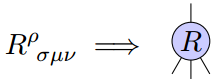

In [2]:
Image(filename='images/Tensor0.png')

The main advantage in TNN comes in representing tensors that are themselves composed of several other tensors.

### Tensor product

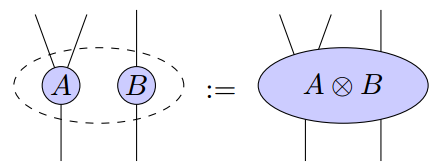

In [3]:
Image(filename='images/TNN0.png')

### Trace

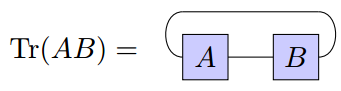

In [4]:
Image(filename='images/Trace.png')

### Contraction

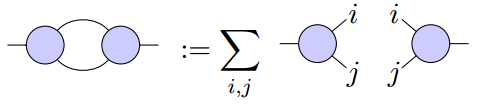

In [5]:
Image(filename='images/Contraction.png')

# Matrix Product States

Matrix product states (MPS) are a natural choice for efficient representation of 1D quantum low
energy states of physically realistic systems. 

In [6]:
%%latex
$|\psi> = \sum_{j_1 ... j_N} C_{j_1 ... j_N} |j_1> \dotsb |j_N>$

<IPython.core.display.Latex object>

The state is completely specified by knowledge of the rank-N tensor C.
MPS consists of approximating the above state as a contraction of N tensors of rank 1. This is achieved with the following steps:

Schmidt decomposition to split the tensor into two parts

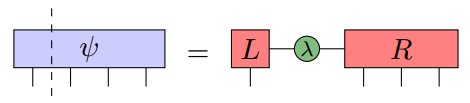

In [7]:
Image(filename='images/Schmidt.png')

With successive singular value decompositions

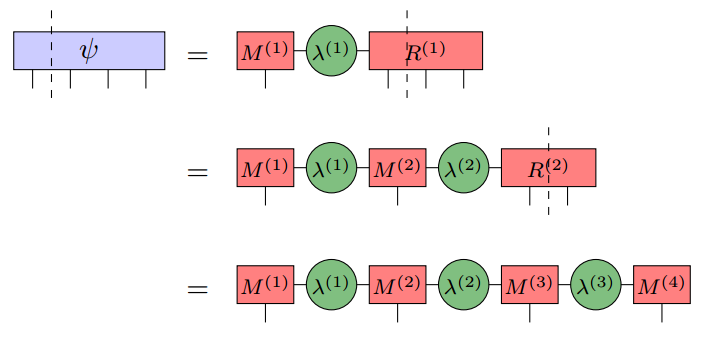

In [8]:
Image(filename='images/SuccessiveSchmidt.png')

We obtain the MPS by contracting the singular values tensors $\lambda$ into the local tensors $M$

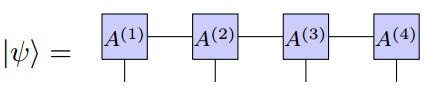

In [9]:
Image(filename='images/MPS.png')

Suppose that only D of the Schmidt weights were non-zero or "close to zero". 
Then we can use the MPS form to take advantage of this by truncating the $\lambda$ matrix. There are many relevant states for which this guarantee good approximation.

# Supervised Learning with Quantum-Inspired Tensor Networks

We have a set of very large vectors $\mathbf{x}$, that are classified by a decision function

In [10]:
%%latex
$f(\mathbf{x}) = W \cdot \Phi(\mathbf{x})$

<IPython.core.display.Latex object>

The feature vector $\Phi(\mathbf{x})$ maps the input vectors $\mathbf{x}$ into a higher dimensional space.
The training consists of finding the optimal weight vector $W$, which can be a difficult task since $W$ can be exponentially large. 
In https://arxiv.org/pdf/1605.05775.pdf the authors find that the optimal weight vector can be approximated as a tensor network. Their approach have the following consequences:
Training the model scales linearly in the training set size.
Tensor networks are also adaptive: dimensions of tensor indices internal to the network grow and shrink during training to concentrate resources on the particular correlations within the data most useful for learning.

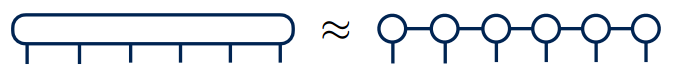

In [11]:
Image(filename='images/WeightTensor.png')

## The feature map

Choose a feature map of the form

In [12]:
%%latex
$\Phi^{s_1 \dotsc s_N}(\mathbf{x}) = \phi^{s_1}(x_1) \otimes \dotsb \otimes \phi^{s_N}(x_N)$

<IPython.core.display.Latex object>

being $\phi^{s_i}(x_i)$ the local feature map and the indices $s_i$ run from $1$ to $d$.
A simple choice

In [13]:
%%latex
$\phi^{s_i}(x_i) = [\cos(\frac{\pi}{2}x_i), \sin(\frac{\pi}{2}x_i)]$

<IPython.core.display.Latex object>

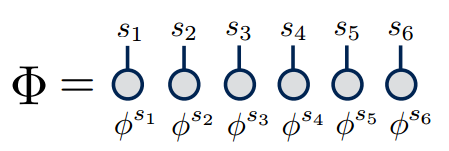

In [14]:
"Image(filename='images/FeatureMap.png')

Tensor network are widely used in statistical mechanics for the study of spin-chain system.  
The choice of this particular feature map translates the original problem in a spin-chain system of dimension 2

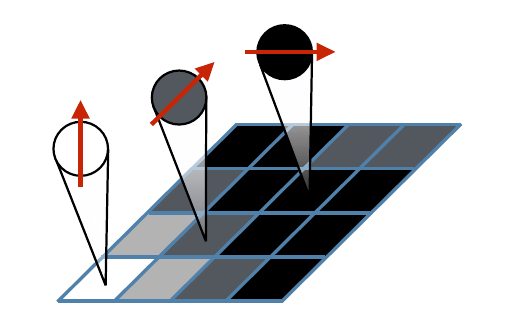

In [15]:
Image(filename='images/spin.png')

## Multiple label classification

Define a set of decision functions labeled by a index $l$

In [16]:
%%latex
$f^l(\mathbf{x}) = W^l \cdot \Phi(\mathbf{x})$

<IPython.core.display.Latex object>

The input $\mathbf{x}$ is classified by choosing the label $l$ for which $|f^l(\mathbf{x})|$ is largest. $W^l$ is a tensor of order N+1.

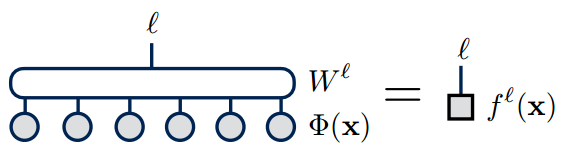

In [17]:
Image(filename='images/MultipleDecisionFunction.png')

## MPS approximation

$W$ is approximated as an MPS

In [18]:
%%latex
$W_{s_1 \dotsb s_N}^l = \sum_{[\alpha]} A_{s_1}^{\alpha_1} A_{s_2}^{\alpha_1 \alpha_2} \dotsb A_{s_i}^{l; \alpha_i \alpha_{i+1}} \dotsb A_{s_N}^{\alpha_N}$

<IPython.core.display.Latex object>

The $[\alpha]$ indices represent the bound. The index $l$ can be arbitrarily placed on the i-th tensor.

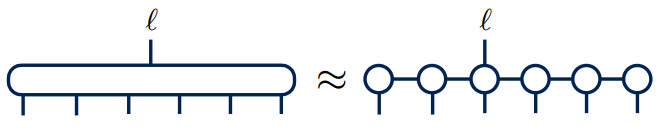

In [19]:
Image(filename='images/WMPS.png')

## Sweeping algorithm for optimizing weights

Minimize the quadratic cost function

In [1]:
%%latex
$C = \frac{1}{2} \sum_{n=1}^{N_T} \sum_l (f^l(\mathbf{x}_n) - \delta^l_{L_n})^2$

<IPython.core.display.Latex object>

$n$ runs over the $N_T$ training inputs and $L_n$ is the known correct label for training input n.

In [21]:
%%latex
$B^{'l} = B^l + \Delta B^l$

<IPython.core.display.Latex object>

In [22]:
%%latex
\begin{align}
\Delta B^l &= - \frac{\partial C}{\partial B^l} \\
&= \sum_{n=1}^{N_T} ( \delta^l_{L_n} - f^l(\mathbf{x}_n) ) \tilde{\Phi}_n
\end{align}

<IPython.core.display.Latex object>

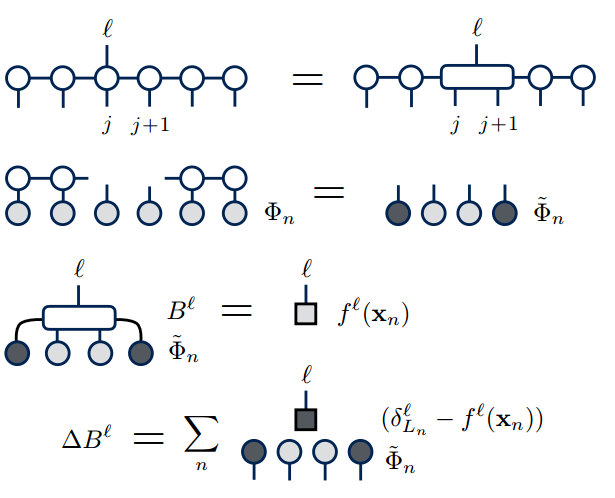

In [23]:
Image(filename='images/Sweeping.png')

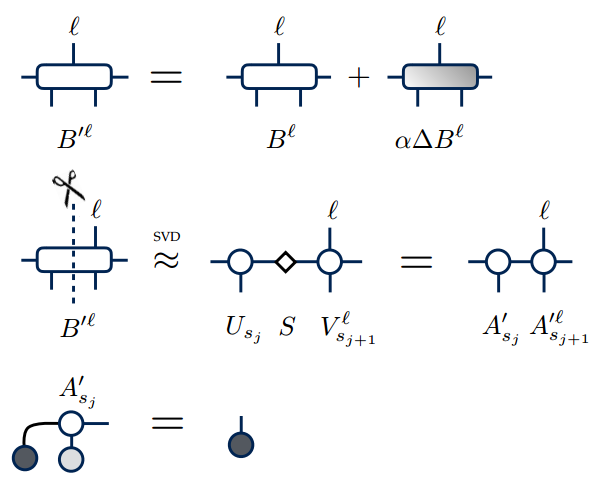

In [24]:
Image(filename='images/Sweeping2.png')

## Toy Model

The input vectors are sampled from two distribution $P_A$ and $P_B$. Two dimensional input space $\mathbf{x}_n = (x_n, y_n)$ mapped to a tensor $\Phi(\mathbf{x}_n) = \phi(x_n) \otimes \phi(y_n)$. The main control parameter is the local dimension $d$.

for $d=2$ 

$$\begin{equation} \phi(x_i) = [\cos(\frac{\pi}{2}x_i), \sin(\frac{\pi}{2}x_i)] \end{equation}$$

for general $d$

$$\begin{equation} \phi^{s_j}(x_i) = \sum_{p=0}^{d-1} \left( d-1, p \right) \cos^{d-s_j}(\frac{\pi}{2}x_i) \sin^{s_j-1}(\frac{\pi}{2}x_i) \end{equation}$$

# Classical Supervised Learning Algorithms
To test the performance of the Tensor Network we compared it with other popular supervised learning algorithm:
*  Support Vector Machines (SVM)
*  Naive Bayes


# Support Vector Machine

<div style= "float:right;position: relative; top: 0px;">
![svm](./images/svm.png "Logo Title Text 1")
</div>
Is a supervised learning algorithm mainly used for classification.  

In its standard form finds the optimal hyperplanes that maximally separate the data.  
  
The core idea is that only the data that lies on the boundary are relevant for the solution

<div style= "float:right;position: relative; top: 0px;">
![svm](./images/svm.png "Logo Title Text 1")
</div>

For example,  consider the binary case with $\vec{x}_i$ data points and $y_i=\pm 1$ labels  

$\vec{w}\cdot \vec(x)-b=0$ defines an hyperplane  

Renormalizing $\vec{w}$ and $b$ we can have the hyperplanes $\vec{w}\cdot \vec(x_i)-b=\pm 1$ to separate the two classes...  

The training condition can be written: $y_i(\vec{w}\cdot \vec(x_i)-b)\geq 1$

<IMG SRC="./images/svm.png" ALIGN="right" HSPACE="0" VSPACE="50"/> 

The optimal decision hyperplane is the one that maximizes:

\begin{equation*}
\text{Margin:}  \left\lVert \frac{2}{\vec{w}} \right\rVert
\end{equation*}
  
Then we have to solve an optimization problem:

\begin{equation*}
\begin{aligned}
& \underset{\vec{w}}{\text{minimize}}
& & \left\lVert \frac{2}{\vec{w}} \right\rVert \\
& \text{subject to}
& & y_i(\vec{w}\cdot \vec(x_i)-b)\geq\pm 1
\end{aligned}
\end{equation*}
  
Having the optimal $\vec{w^*}$, the classification is straightforward:
\begin{equation*}
y_{new}=\text{sign}(\vec{w^*}\cdot\vec{x_{new}}+b)
\end{equation*}


The dual form of the optimization problem involves only internal products between the $\vec{x_i}$.  

This feature permits to generalize the SVM outside the linear case substituting the dot products with kernel matrix $K(x,x')=\langle \phi(\vec x)| \phi(\vec x')\rangle$...
  
In this way the data are mapped into an higher dimensional space and problems that were not linearly separable become linearly separable in this higher dimensional space  



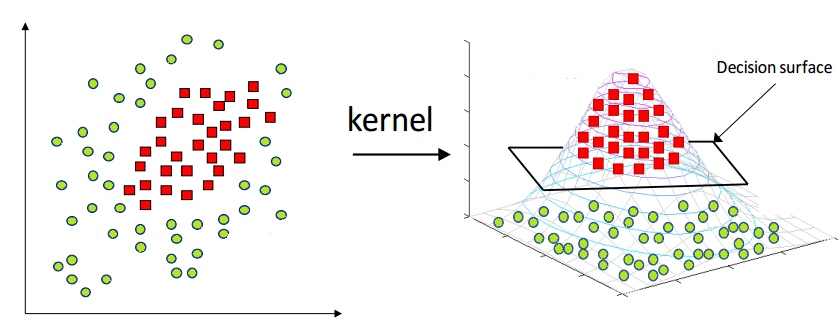

In [3]:
Image(filename='images/kernel.png')

In our code we compared the Tensor Network to Linear, Polylnomial and Gaussian Kernels for the SVM

# Naive Bayes

The Naive Bayes classifier is, as the name suggests, a classifier based on the Bayes Theorem...  
The suffix Naive is related to a strong approximation about the independence of the conditional probabilities...  

In a classification problem we are interested in the probability that an object belongs to one class $y_i$ given the knowledge of some data vector $\vec x=(x_1,...,x_n)$ that describes the data. So if we apply the Bayes theorem we get:
\begin{equation}
P(y_i | \vec x)=\frac{P( \vec x | y_i )P(y_i)}{P(\vec x)}=\frac{P( \vec x , y_i )}{P(\vec x)}
\end{equation}
Now, $P(\vec x)$ is constant and using the independence assumption:
\begin{equation}
P(y_i | \vec x)=k\sum_i P(y_i)\prod_j P( x_j |  y_i )
\end{equation}


This has a simple Bayesian Network interpretation:

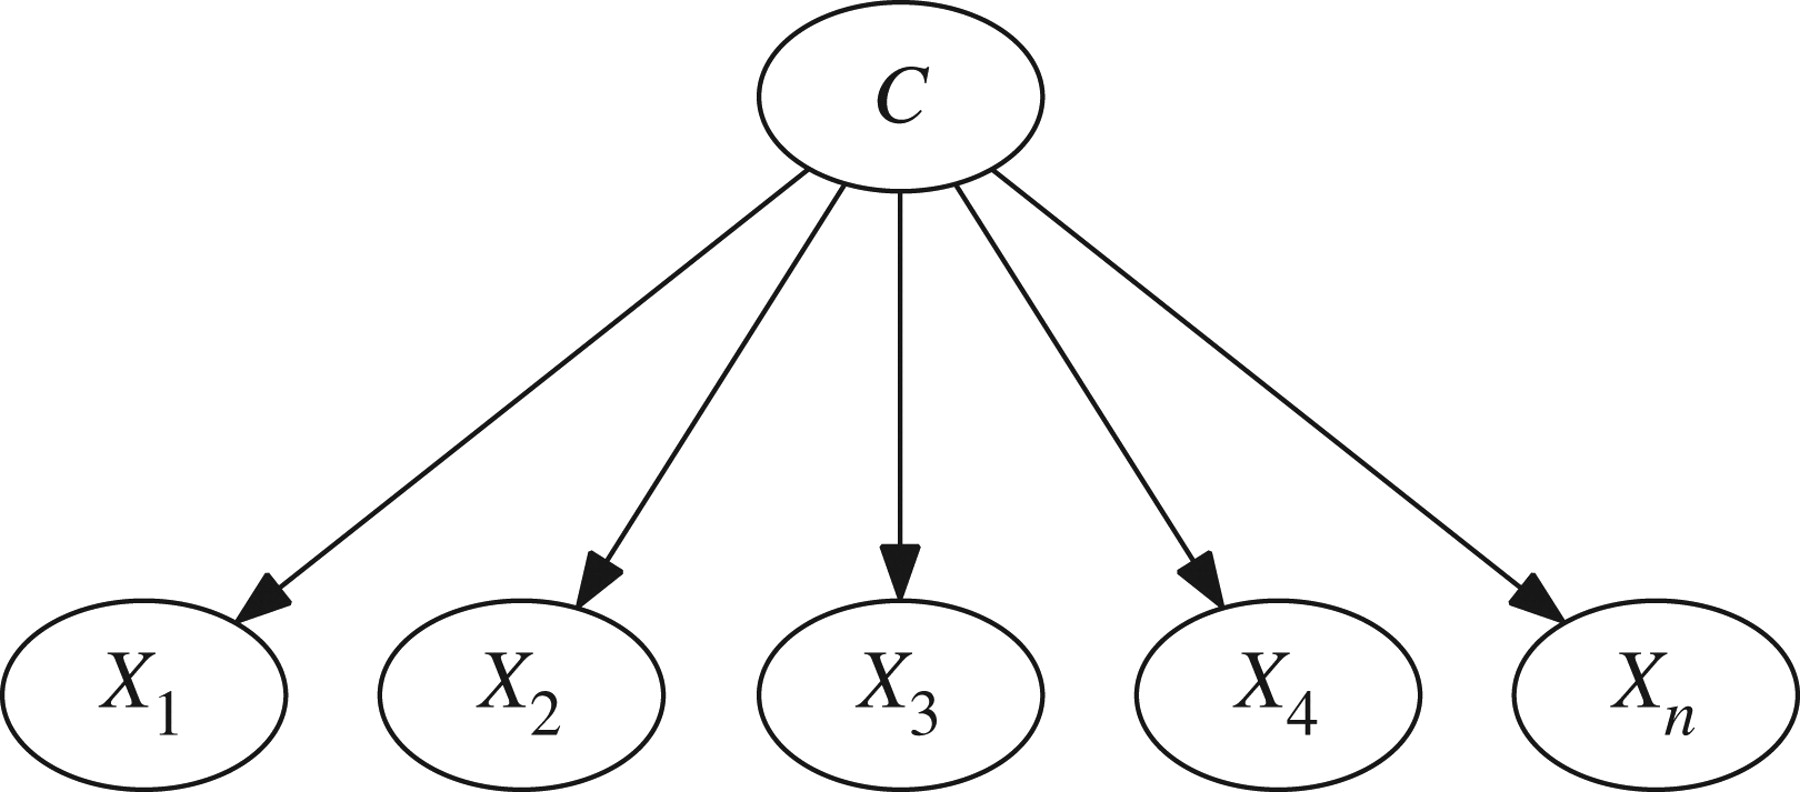

In [3]:
Image(filename="images/nb.jpg")

In [ ]:
Graph

# Code implementation

## Gaussian distributions

## Semi circular uniform distributions

## Circular distributions

## Spiral distributions